In [1]:
from fastai.tabular.all import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
path = 'C:/Users/light\Documents\Fastbook\Personal-Machine-Learning-Data'

In [5]:
df = pd.read_csv('Personal-Machine-Learning-Data/auto-mpg.csv', 
                 header=None,
                 names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'],
                 sep='\s+',
                 low_memory=False)

OSError: [Errno 22] Invalid argument: '*\\Personal-Machine-Learning-Data\x07uto-mpg.csv'

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df = df.drop(['car name'], axis=1)

In [6]:
df = df.replace('?', np.nan)
median_hp = df['horsepower'].median()
df['horsepower'].replace(np.nan,median_hp,inplace=True)

In [7]:
df.to_csv('mpg_isclean.csv',index=False)

In [8]:
df = pd.read_csv('mpg_isclean.csv', low_memory=False)

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [11]:
dep_var = 'mpg'

In [12]:
df[dep_var] = np.log(df[dep_var])

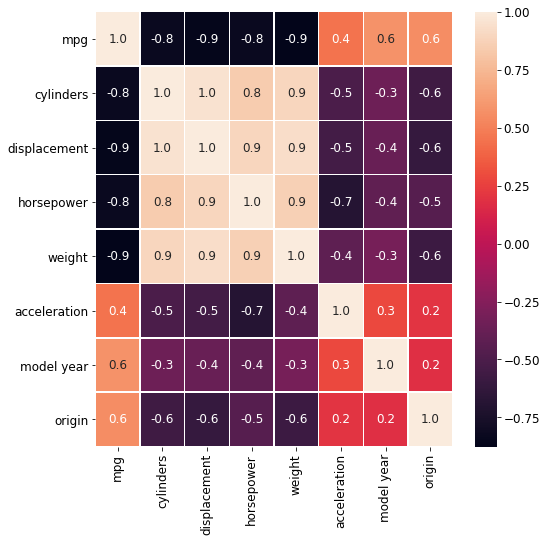

In [13]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

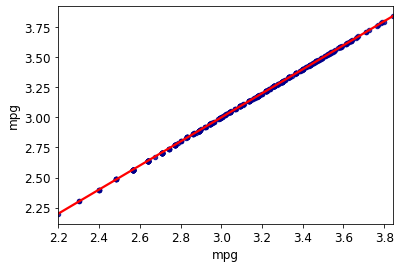

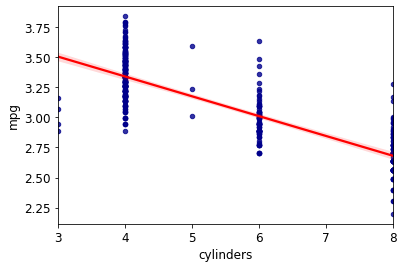

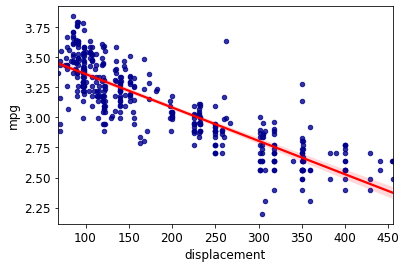

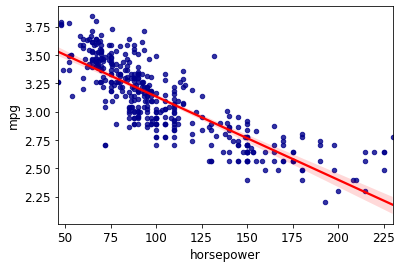

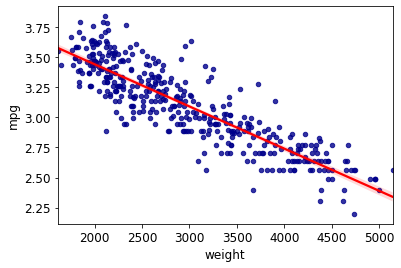

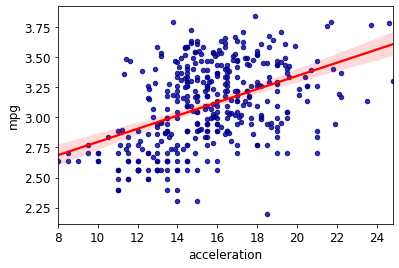

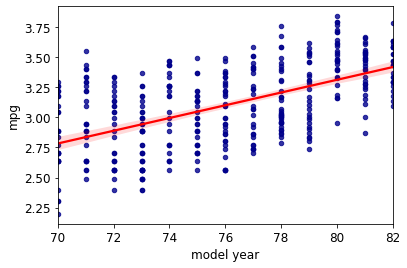

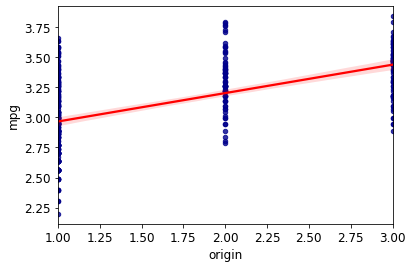

In [14]:
for x in df.columns:
    plt.figure()
    sns.regplot(data=df, x=x, y='mpg',
               scatter_kws={"color":"darkblue",'s':20},
               line_kws={"color":"red"})

In [15]:
procs = [Categorify, FillMissing]

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [17]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [18]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [19]:
len(to.train), len(to.valid)

(319, 79)

In [20]:
to.show(3)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
28,8,304.0,193.0,4732.0,18.5,70,1,2.197225
116,8,400.0,230.0,4278.0,9.5,73,1,2.772589
166,8,302.0,129.0,3169.0,12.0,75,1,2.564949


In [21]:
save_pickle('to_auto_mpg.pkl',to)

In [22]:
to = load_pickle('to_auto_mpg.pkl')

In [23]:
xs, y = to.train.xs, to.train.y
v_xs, v_y = to.valid.xs, to.valid.y

In [24]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

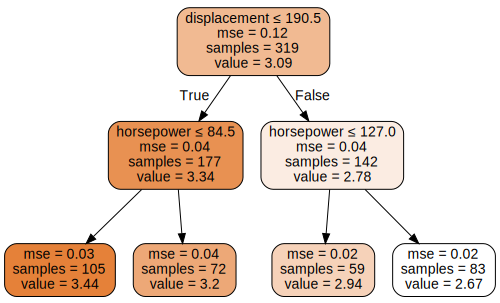

In [25]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

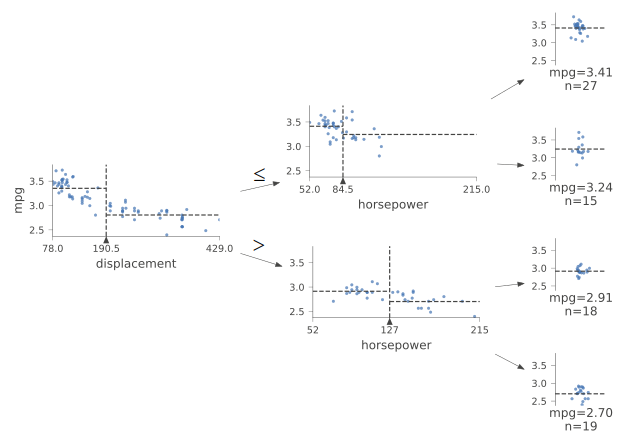

In [26]:
samp_idx = np.random.permutation(len(y))[:79]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [27]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [28]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [29]:
m_rmse(m, xs, y)

0.0

In [30]:
m_rmse(m, v_xs, v_y)

0.138026

In [31]:
m.get_n_leaves(), len(xs)

(260, 319)

In [32]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, v_xs, v_y)

(0.127419, 0.128986)

In [33]:
m.get_n_leaves()

10

In [34]:
def rf(xs, y, n_estimators=40, max_samples=300, max_features=0.5, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                              max_samples=max_samples, max_features=max_features,
                              min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [35]:
m = rf(xs, y);

In [36]:
m_rmse(m, xs, y), m_rmse(m, v_xs, v_y)

(0.106348, 0.116026)

In [37]:
preds = np.stack([t.predict(v_xs) for t in m.estimators_])

In [38]:
r_mse(preds.mean(0), v_y)

0.116026

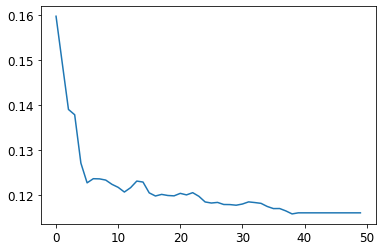

In [39]:
plt.plot([r_mse(preds[:i+1].mean(0), v_y) for i in range(50)]);

In [40]:
r_mse(m.oob_prediction_, y)

0.124446

In [41]:
preds = np.stack([t.predict(v_xs) for t in m.estimators_])

In [42]:
preds.shape

(40, 79)

In [43]:
preds_std = preds.std(0)

In [44]:
preds_std[:5]

array([0.05989578, 0.07056196, 0.08151931, 0.11694214, 0.1058498 ])

In [45]:
def rf_feat_import(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [46]:
fi = rf_feat_import(m, xs)
fi

,cols,imp
1,displacement,0.318166
3,weight,0.305218
0,cylinders,0.170996
2,horsepower,0.121560
5,model year,0.073244
4,acceleration,0.007296
6,origin,0.003520


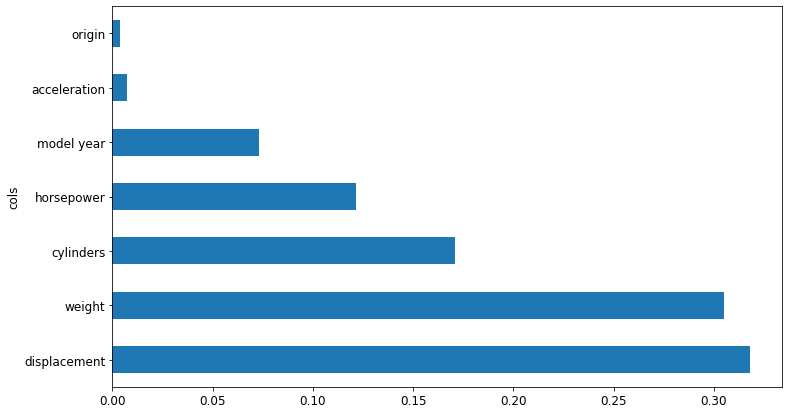

In [47]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi);

In [48]:
to_keep = fi[fi.imp>0.15].cols
len(to_keep)

3

In [49]:
xs_imp = xs[to_keep]
v_xs_imp = v_xs[to_keep]

In [50]:
m = rf(xs_imp, y)

In [51]:
m_rmse(m, xs_imp, y), m_rmse(m, v_xs_imp, v_y)

(0.150905, 0.154046)

In [52]:
len(xs.columns), len(xs_imp.columns)

(7, 3)

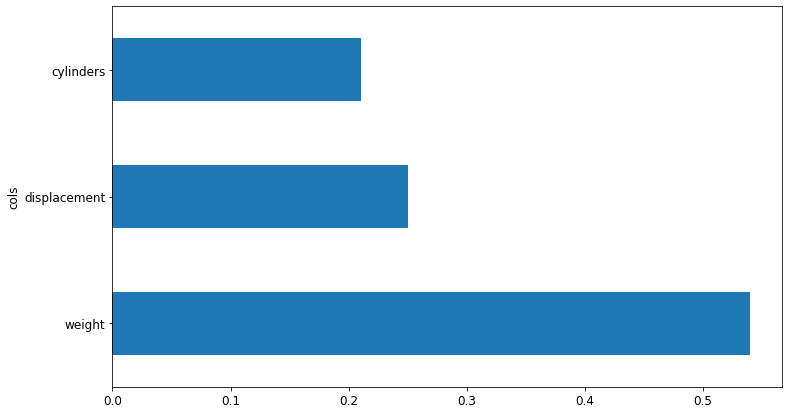

In [53]:
plot_fi(rf_feat_import(m, xs_imp));

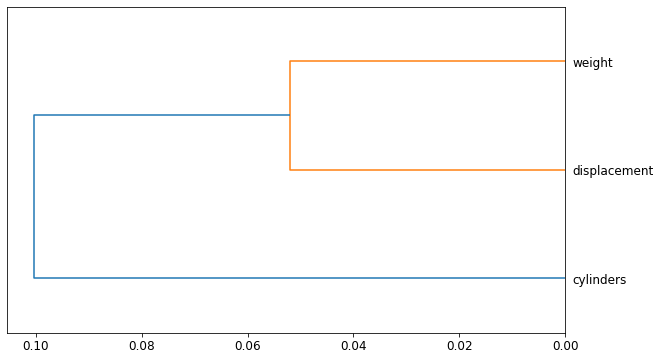

In [54]:
cluster_columns(xs_imp)

In [55]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10,
        max_samples=300, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [56]:
get_oob(xs_imp)

0.7708949773384708

In [57]:
xs_final = xs_imp
v_xs_final = v_xs_imp

In [58]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, v_xs_final, v_y)

(0.151182, 0.157513)

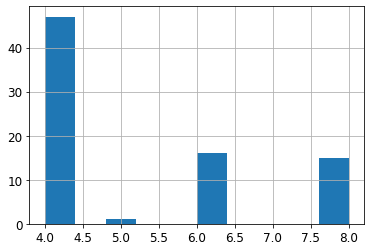

In [59]:
ax = v_xs_final['cylinders'].hist()

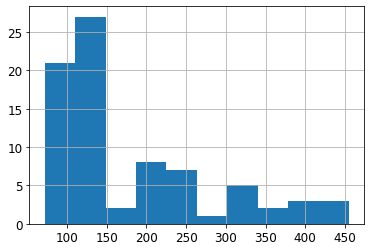

In [60]:
bx = v_xs_final['displacement'].hist()

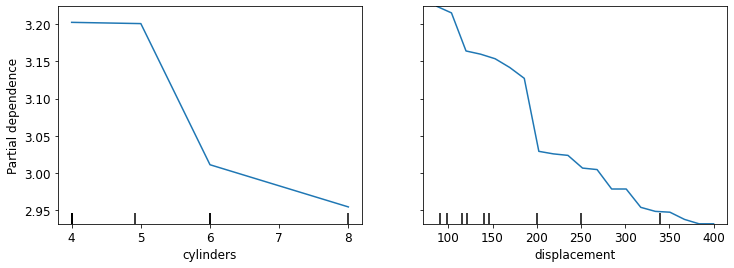

In [61]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, v_xs_final, ['cylinders', 'displacement'],
                       grid_resolution=20, ax=ax)

In [62]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [63]:
row = v_xs_final.iloc[:5]

In [64]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [65]:
prediction[0],bias[0],contributions[0].sum()

(array([3.40822735]), 3.0929072371323905, 0.31532010994536797)

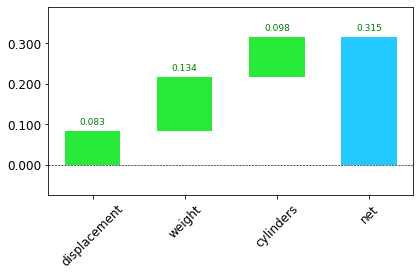

In [66]:
waterfall(v_xs_final.columns, contributions[0], threshold=0.01,
         rotation_value=45, formatting='{:,.3f}');

In [67]:
df_dom = pd.concat([xs_final, v_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(v_xs_final))

m = rf(df_dom, is_valid)
rf_feat_import(m, df_dom)

,cols,imp
0,displacement,0.528915
1,weight,0.419438
2,cylinders,0.051647


In [68]:
m = rf(xs_final, y)
print('orig', m_rmse(m, v_xs_final, v_y))

for c in ('weight','displacement','cylinders'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, v_xs_final.drop(c,axis=1), v_y))

orig 0.155035
weight 0.168681
displacement 0.159757
cylinders 0.151679


In [69]:
time_vars = ['weight']
xs_final_time = xs_final.drop(time_vars, axis=1)
v_final_xs_time = v_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, v_final_xs_time, v_y)

0.168197

In [70]:
xs_filt = xs_final_time
y_filt = y

In [71]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, v_final_xs_time, v_y)

(0.166325, 0.167012)

In [72]:
df_nn = pd.read_csv('mpg_isclean.csv', low_memory=False)
df_nn[dep_var] = np.log(df_nn[dep_var])

In [73]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [74]:
procs_nn = [Categorify, FillMissing]
cont_nn, cat_nn = cont_cat_split(df_nn_final, 1, dep_var=dep_var)
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, y_names=dep_var, splits=splits)

In [75]:
dls = to_nn.dataloaders()

In [76]:
y = to_nn.train.y
y.min(), y.max()

(2.1972246, 3.7977338)

In [77]:
learn = tabular_learner(dls, y_range=(2.1, 3.8), layers=[500,250], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00015848931798245758)

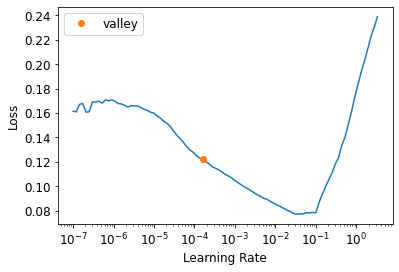

In [78]:
learn.lr_find()

In [79]:
learn.fit_one_cycle(40, 1e-35)

epoch,train_loss,valid_loss,time
0,0.163113,0.195398,00:00
1,0.168460,0.213545,00:00
2,0.169801,0.219477,00:00
3,0.171028,0.209710,00:00
4,0.170124,0.195718,00:00
5,0.170575,0.183594,00:00
6,0.169620,0.170947,00:00
7,0.168659,0.161277,00:00
8,0.168259,0.153555,00:00
9,0.169768,0.150151,00:00


In [80]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.416868

In [81]:
rf_preds = m.predict(v_final_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) / 2

In [82]:
r_mse(ens_preds, v_y)

0.247435